In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from google.colab import drive
drive.mount('/content/drive')

# Baca gambar grayscale dari Google Drive
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Picture/ishowspeed.jpg', 0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Contoh Thresholding

## Global Thresholding

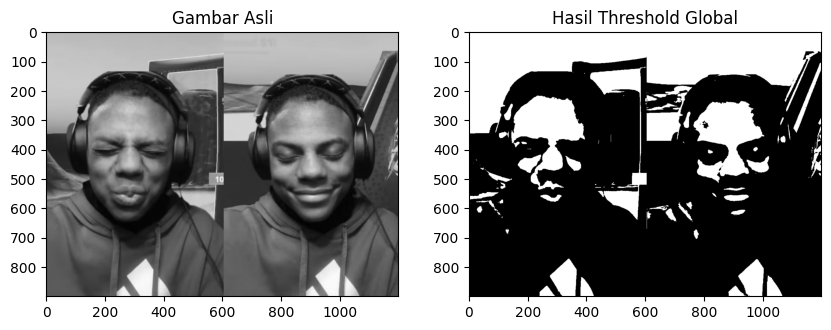

In [16]:
# Terapkan threshold global
_, thresholded_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Tampilkan gambar asli dan hasil thresholding
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Gambar Asli')
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Hasil Threshold Global')
plt.show()

## Adaptive Thresholding

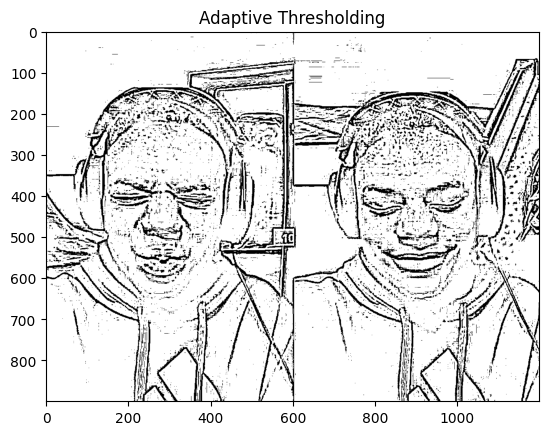

In [17]:
#Terapkan adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold (image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

#Tampilkan hasil adaptive thresholding
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding')
plt.show()

## Otsu's Thresholding

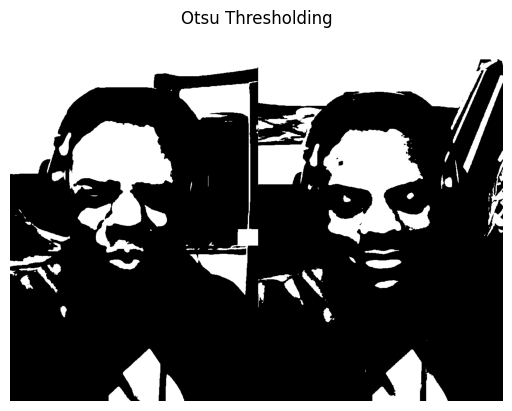

In [18]:
# Terapkan Otsu's thresholding
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Tampilkan hasil Otsu's thresholding
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu Thresholding")
plt.axis('off')
plt.show()

# Contoh Penggunaan Active Contour

In [19]:
from skimage import data, color
from skimage.filters import gaussian
from skimage.segmentation import active_contour

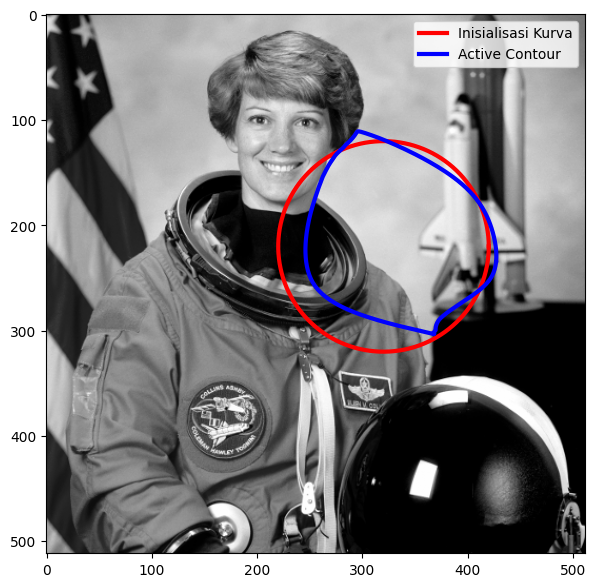

In [20]:
# Memuat citra contoh
image = data.astronaut()
image_gray = color.rgb2gray(image)

# Menggunakan Gaussian filter untuk menghaluskan citra
image_smooth = gaussian(image_gray, 3)

# Inisialisasi kurva lingkaran awal di sekitar objek
s = np.linspace(0, 2 * np.pi, 400)
r = 220 + 100 * np.sin(s)
c = 320 + 100 * np.cos(s)
init = np.array([r, c]).T

# Terapkan active contour untuk mendeteksi tepi
snake = active_contour(image_smooth, init, alpha=0.015, beta=10, gamma=0.001)

# Plot hasilnya
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(image_gray, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '-r', lw=3, label='Inisialisasi Kurva')
ax.plot(snake[:, 1], snake[:, 0], 'b', lw=3, label='Active Contour')
ax.legend()
plt.show()